<a href="https://colab.research.google.com/github/soyab266/data-science/blob/master/dog_vs_cat_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
import keras
from keras.datasets import mnist
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.layers import LSTM,Dense, Flatten


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:10<00:00, 33.1MB/s]
100% 1.06G/1.06G [00:10<00:00, 111MB/s] 


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
train_df=keras.utils.image_dataset_from_directory(
directory='/content/train',labels= "inferred",label_mode='int', batch_size=32, image_size=(256,256)
)



validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image, label

train_ds=train_df.map(process)
validation_ds=validation_ds.map(process)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='valid', input_shape=(256,256,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
history=model.fit( train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
625/625 [==============================] - 80s 105ms/step - loss: 1.3375 - accuracy: 0.5942 - val_loss: 0.6136 - val_accuracy: 0.6710
Epoch 2/5
625/625 [==============================] - 66s 105ms/step - loss: 0.5797 - accuracy: 0.6967 - val_loss: 0.5471 - val_accuracy: 0.7366
Epoch 3/5
625/625 [==============================] - 66s 105ms/step - loss: 0.4854 - accuracy: 0.7658 - val_loss: 0.5692 - val_accuracy: 0.7306
Epoch 4/5
625/625 [==============================] - 69s 109ms/step - loss: 0.4326 - accuracy: 0.8015 - val_loss: 0.5106 - val_accuracy: 0.7646
Epoch 5/5
625/625 [==============================] - 90s 143ms/step - loss: 0.3663 - accuracy: 0.8400 - val_loss: 0.5826 - val_accuracy: 0.7202


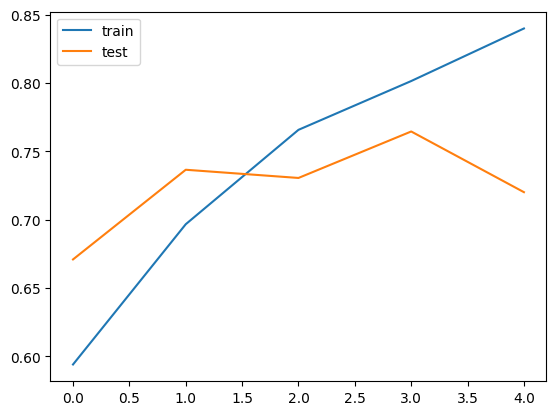

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()

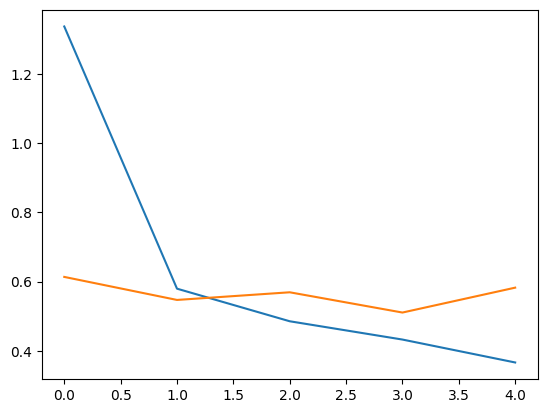

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

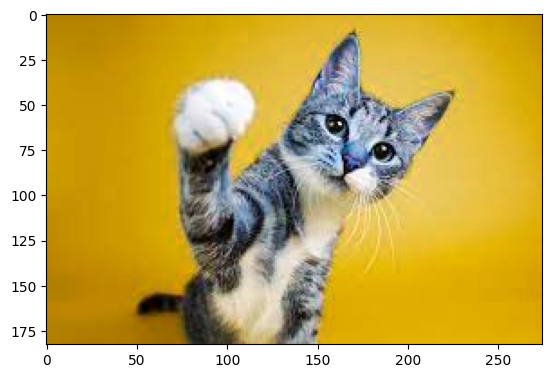

In [13]:
import cv2
test_img=cv2.imread('/content/cat.jpg')
plt.imshow(test_img)


In [15]:
test_img.shape

(183, 275, 3)

In [17]:
test_img = cv2.resize(test_img,(256,256))

In [18]:

test_input = test_img.reshape((1,256,256,3))

In [19]:
model.predict(test_input)

1/1 [==============================] - 0s 370ms/step


array([[0.]], dtype=float32)

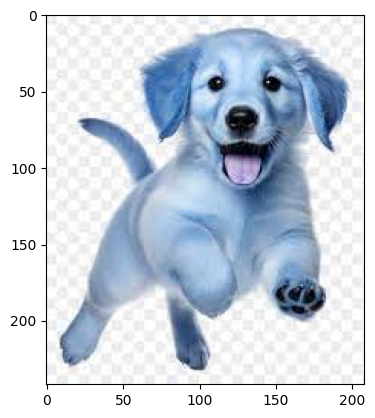

In [20]:
test_img=cv2.imread('/content/dog.jpg')
plt.imshow(test_img)

In [21]:
test_img.shape

(242, 208, 3)

In [25]:
test_img=cv2.resize(test_img,(256,256))

In [27]:
input=test_img.reshape((1,256,256,3))

In [28]:
model.predict(input)

1/1 [==============================] - 0s 25ms/step


array([[1.]], dtype=float32)